<a href="https://colab.research.google.com/github/Neo-glitch/computer-vision-masterclass/blob/main/AutoEncoders.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Auto Encoders can be used for various purposes like;**

    * Image compression
    * Dimensionality reduction
    * Image Denoising
    * Fraud Detection 

#### **Linear AutoEncoders**

In [1]:
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, \
                                    Input  # serve as input layer of a nn
import numpy as np
import matplotlib.pyplot as plt


##### Loading the dataset

In [2]:
from tensorflow.keras.datasets import mnist


(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train.shape, y_train.shape

11501568/11490434 [==============================] - 0s 0us/step


((60000, 28, 28), (60000,))

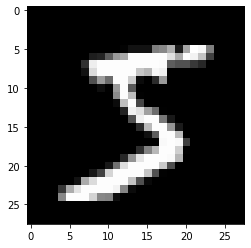

In [3]:
plt.imshow(x_train[0], cmap ="gray")

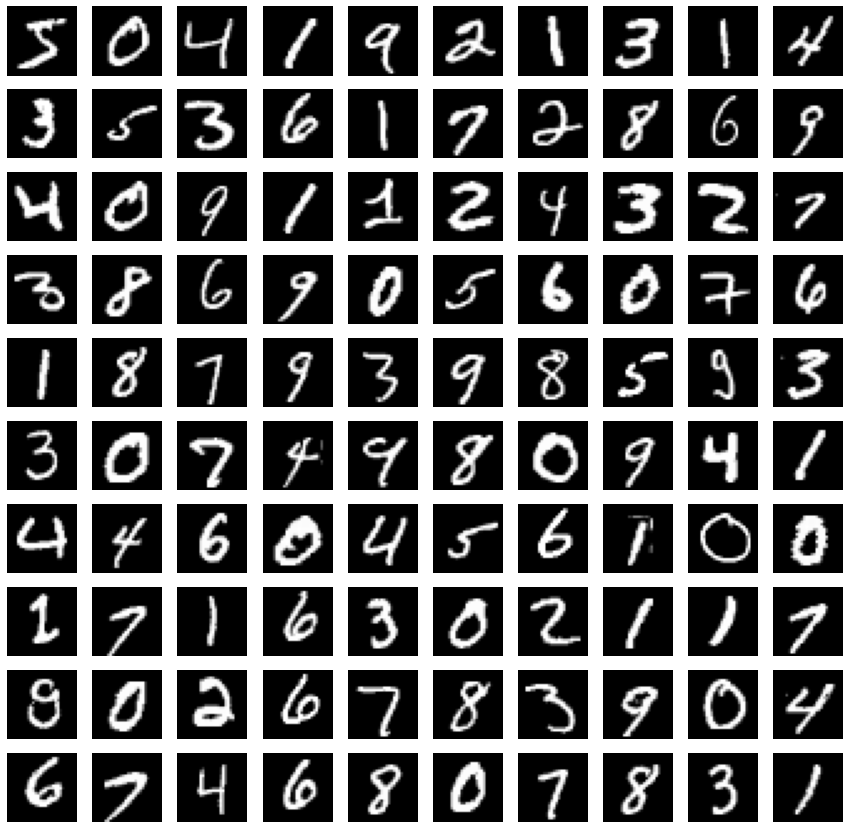

In [4]:
width = 10
height = 10

fig, axs = plt.subplots(height, width, figsize = (15, 15))
axs = axs.flatten() # 10 x 10 to 100 

for i in np.arange(0, width * height):
  axs[i].imshow(x_train[i], cmap ="gray")
  axs[i].axis("off")

In [5]:
# scale pixel
x_train = x_train / 255.

x_test = x_test / 255.

#### Building and Training Linear AutoEncoder

In [8]:
# since using nn to create AutoEncoder working with images, we need to flatten image from 28 * 28 to 784

x_train = x_train.reshape(x_train.shape[0],-1)
x_test = x_test.reshape(x_test.shape[0], -1)

In [9]:
x_train.shape, x_test.shape

((60000, 784), (10000, 784))

In [10]:
# structure will be 784 - 128 - 64 - 32 - 64 - 128 - 784

autoencoder = Sequential()

# Encode
autoencoder.add(Input(shape = (784,)))
autoencoder.add(Dense(128, activation = "relu"))
autoencoder.add(Dense(64, activation ="relu"))
autoencoder.add(Dense(32, activation ="relu"))   # Encoded image in this layer


# Decode
autoencoder.add(Dense(64, activation ="relu"))
autoencoder.add(Dense(128, activation = "relu"))
autoencoder.add(Dense(784, activation = "sigmoid"))

autoencoder.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 64)                2112      
                                                                 
 dense_4 (Dense)             (None, 128)               8320      
                                                                 
 dense_5 (Dense)             (None, 784)               101136    
                                                                 
Total params: 222,384
Trainable params: 222,384
Non-trai

In [11]:
autoencoder.compile(optimizer = "Adam", loss = "binary_crossentropy", metrics = ["accuracy"])

In [12]:
# N.B no need to take into consideration accuracy score for auto encoders
autoencoder.fit(x_train, x_train, epochs = 50)

Epoch 1/50
1875/1875 [==============================] - 8s 3ms/step - loss: 0.1520 - accuracy: 0.0106
Epoch 2/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1075 - accuracy: 0.0113
Epoch 3/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0988 - accuracy: 0.0125
Epoch 4/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0947 - accuracy: 0.0128
Epoch 5/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0919 - accuracy: 0.0125
Epoch 6/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0898 - accuracy: 0.0126
Epoch 7/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0883 - accuracy: 0.0125
Epoch 8/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0872 - accuracy: 0.0126
Epoch 9/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0862 - accuracy: 0.0120
Epoch 10/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.085

#### Encoding and Decoding Images

In [14]:
# 784 - 128 - 64 - 32 (Encoding)
encoder = Model(inputs = autoencoder.input, 
                outputs = autoencoder.get_layer("dense_2").output  # "dense_2 is the layer name having 32 neurons"
                )

encoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
Total params: 110,816
Trainable params: 110,816
Non-trainable params: 0
_________________________________________________________________


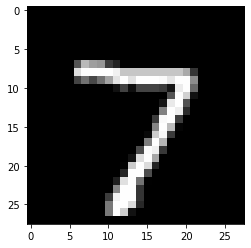

In [16]:
plt.imshow(x_test[0].reshape(28, 28), cmap="gray")

In [20]:
# encodes the image
encoded_image = encoder.predict(x_test[0].reshape(1, -1))

Encoded image shape is:  (1, 32)


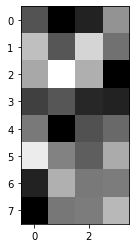

In [25]:
print("Encoded image shape is: " , encoded_image.shape)

plt.imshow(encoded_image.reshape(8, 4), cmap = "gray")

In [28]:
# Decoder 32 - 64 - 128 - 784
input_layer_decoder = Input(shape = (32,))
decoder_layer1= autoencoder.layers[3]  # get layer by index
decoder_layer2 = autoencoder.layers[4]
decoder_layer3 = autoencoder.layers[5]

decoder = Model(inputs = input_layer_decoder,
                # one line way of connecting layers
                outputs = decoder_layer3(decoder_layer2(decoder_layer1(input_layer_decoder))))

decoder.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 32)]              0         
                                                                 
 dense_3 (Dense)             (None, 64)                2112      
                                                                 
 dense_4 (Dense)             (None, 128)               8320      
                                                                 
 dense_5 (Dense)             (None, 784)               101136    
                                                                 
Total params: 111,568
Trainable params: 111,568
Non-trainable params: 0
_________________________________________________________________


In [29]:
# does image decoding
decoded_image = decoder.predict(encoded_image)

decoded_image.shape

(1, 784)

(-0.5, 27.5, 27.5, -0.5)

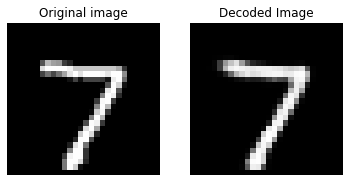

In [35]:
fig, axs = plt.subplots(1, 2)

axs = axs.ravel()

axs[0].imshow(x_test[0].reshape(28, 28), cmap ="gray")
axs[0].set_title("Original image")
axs[0].axis("off")

axs[1].imshow(decoded_image.reshape(28, 28), cmap ="gray")
axs[1].set_title("Decoded Image")
axs[1].axis("off")

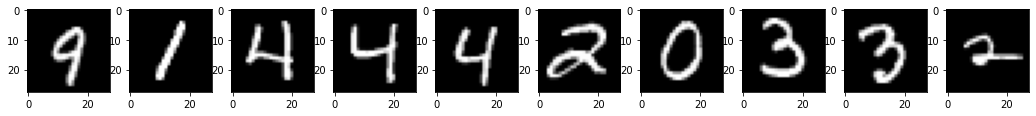

In [37]:
# Encoding and Decoding Image
n_images = 10

# index of x_test to work with
test_images= np.random.randint(0, x_test.shape[0] - 1, size = n_images)
plt.figure(figsize = (18, 18))

for i, image_index in enumerate(test_images):

  # enables having new axis for each item based on i+ 1 value 
  ax = plt.subplot(10, 10, i + 1)
  plt.imshow(x_test[image_index].reshape(28, 28), cmap ="gray")
  plt.xticks()
  plt.yticks()

  #Coded images
  ax = 
  